In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import warnings
from functions_master import *
from glob import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import pyplot as plt
from matplotlib import gridspec
from ipywidgets import interact, FloatSlider
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.animation as animation
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from colorsys import hsv_to_rgb
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
c = 0.299792458 # speed of light mm/ps

In [3]:
archivos_dat_ref, archivos_dat_samp = preparar_y_procesar(
    sample=5,
    base_dir=os.getcwd(),
    project_rel=os.path.join("EuZn2P2","src"),
    out_subdir="carpeta1",
    pattern="*.dat",
    rang=4,  # lo que antes llamabas 'rang'
    limpiar_salidas_previas=True
)


Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_118.4K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_142.9K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_166.2K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_18.5K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_188.8K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_210.8K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_232.4K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_253.5K.dat elim

In [ ]:
ui, sliders = make_anim_widget(
    archivos_dat_samp=archivos_dat_samp,
    archivos_dat_ref=archivos_dat_ref,
    getFilterdata=getFilterdata,
    FourierT2=FourierT2,
    extraer_temperatura=extraer_temperatura,
    # clave:
    freq_window=(0.25, 1.0),# (xmin, xmax) THz
    write_to="user_ns",   # default; escribe en el notebook
    var_names=('n0','n1','n2'),
    # --- rangos de sliders (min, max, default, step) ---
    left_range=(320.0, 423.0, 392.5, 0.1),
    right_sample_range=(380.0, 450.0, 412, 0.1),
    right_subs_range=(380.0, 450.0, 433.4, 0.1)
)

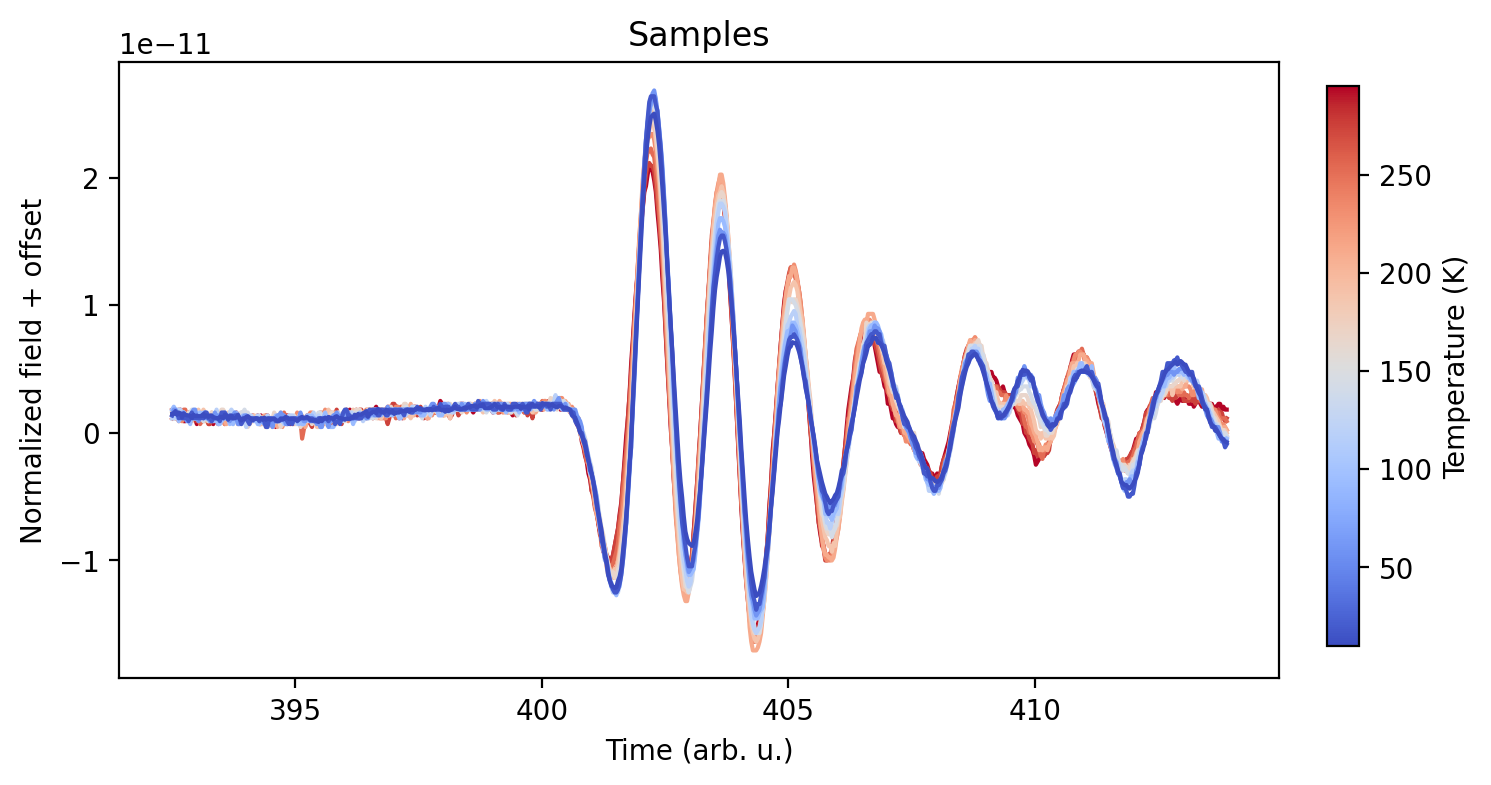

In [28]:
plot_all_samples(
    left=n0,  # o el valor que quieras
    right_sample=n1,
    archivos_dat_samp=archivos_dat_samp,
    getFilterdata=getFilterdata,
    extraer_temperatura=extraer_temperatura,
    offset_factor=0,
    title="Samples",
    cmap=cm.coolwarm
    
)


In [6]:
generate_temporal_gif(
    n0,
    n1,
    n2,
    archivos_dat_samp=archivos_dat_samp,
    archivos_dat_ref=archivos_dat_ref,
    getFilterdata=getFilterdata,
    extraer_temperatura=extraer_temperatura,
    save_path='mi_animacion.gif',
    figsize=(8, 5),
    interval=300,
    fps=3
)


# Transmitance spectrum

In [10]:
generate_gif2(
    n0=n0,
    n1=n1,
    n2=n2,
    archivos_dat_samp=archivos_dat_samp,
    archivos_dat_ref=archivos_dat_ref,
    getFilterdata=getFilterdata,
    extraer_temperatura=extraer_temperatura,
    FourierT2=FourierT2,
    save_path='mi_animacion_espectro.gif',
    interval=300,
    fps=3,
    N=2**13,                  # parámetros para create_frame
    fft_fs=30,
    fft_k=15,
    fft_xlim=(0.25, 1.0)
)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


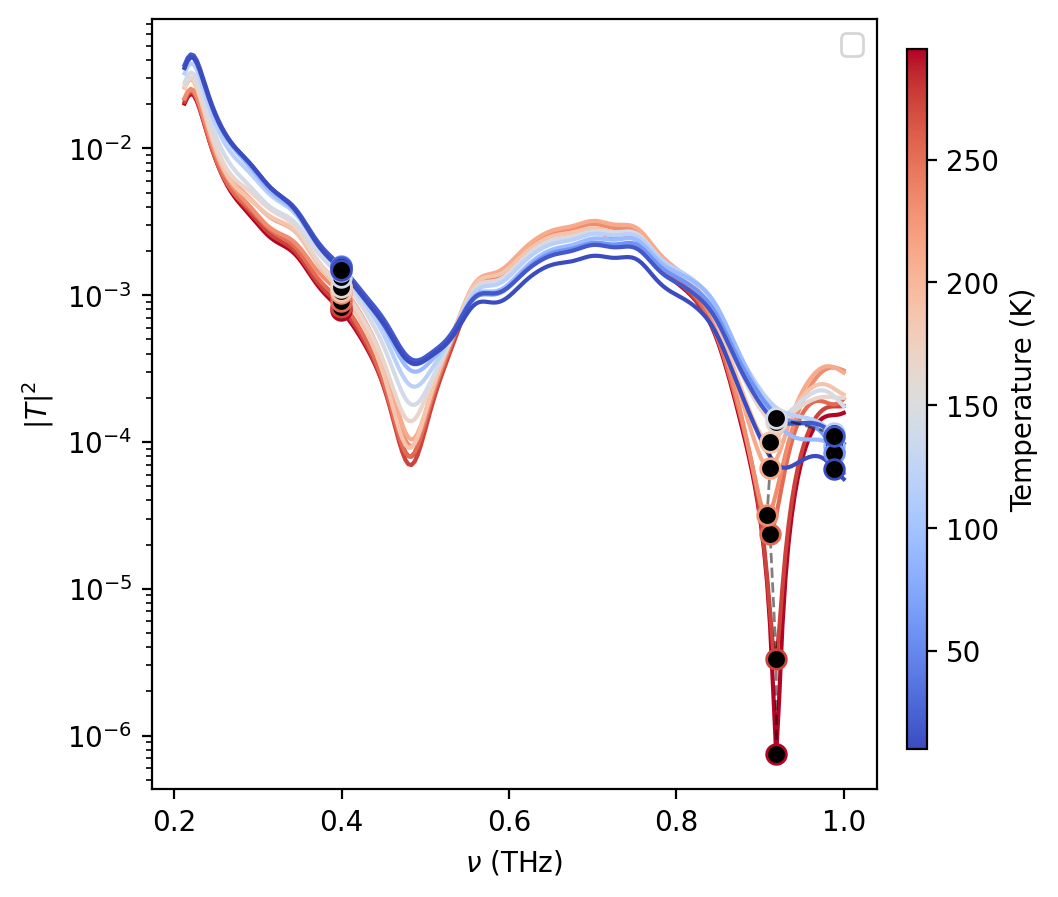

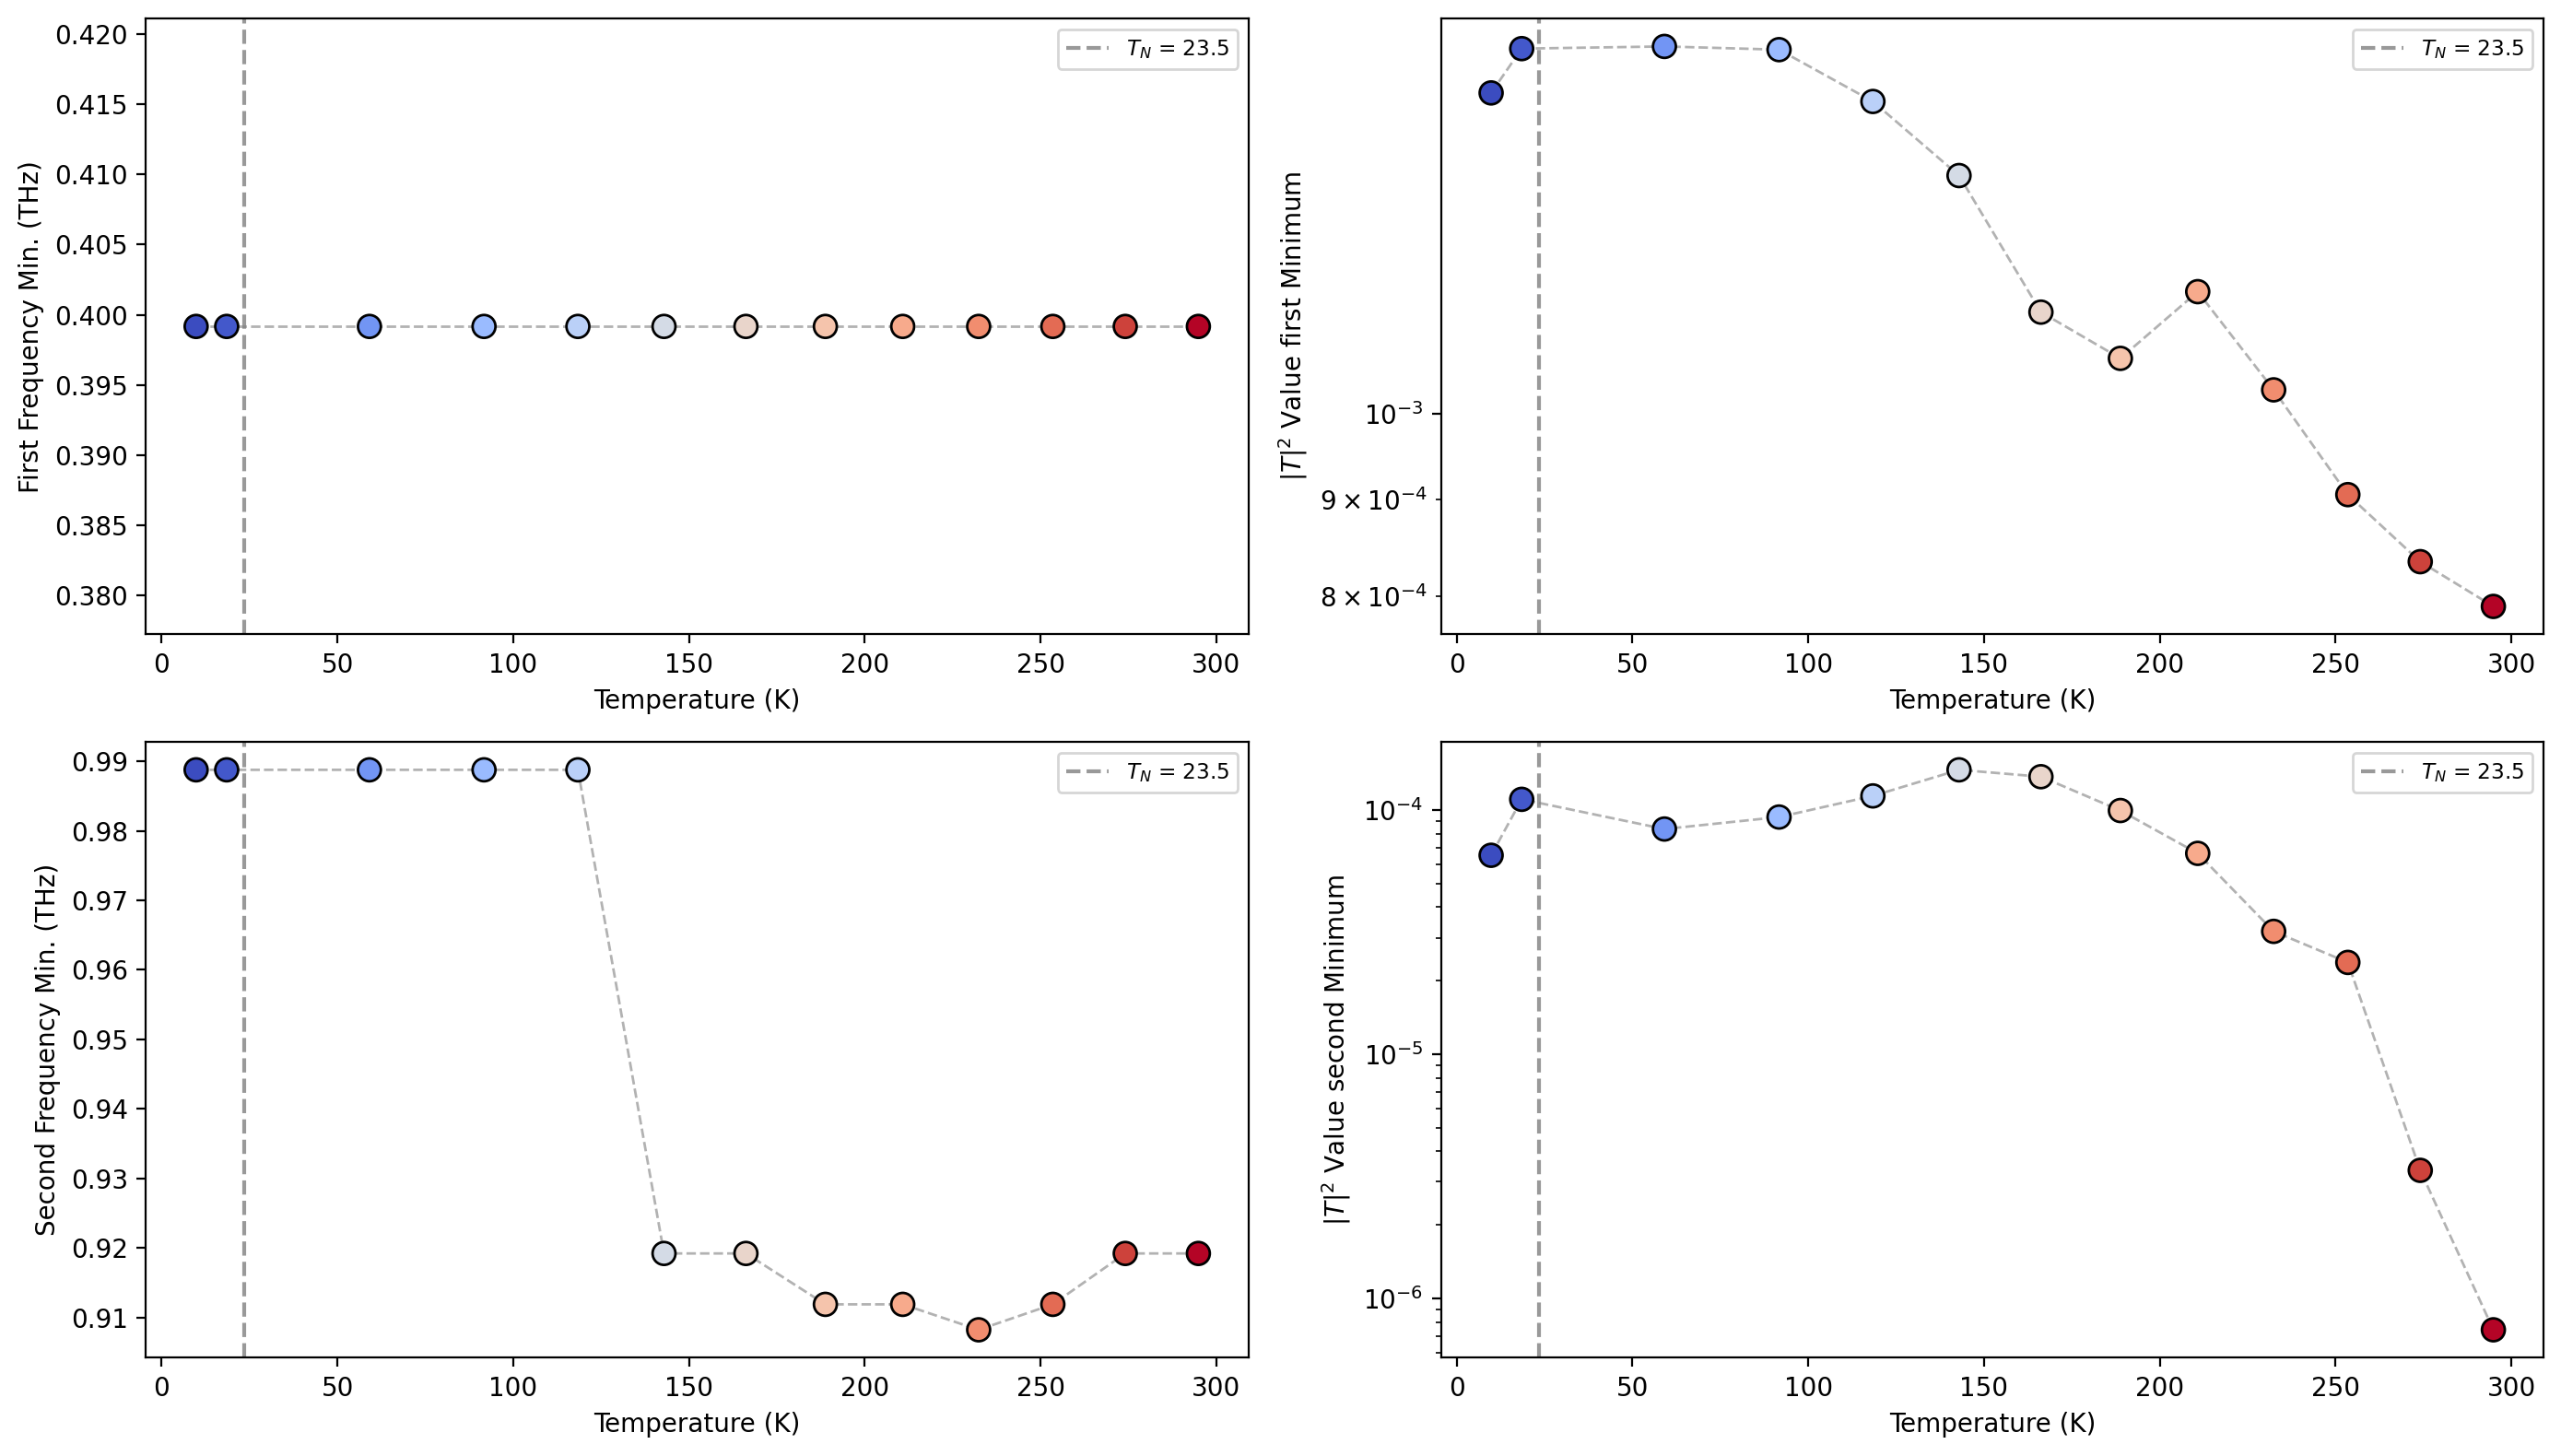

In [4]:
res = plot_frequency_samples(
    archivos_dat_samp=archivos_dat_samp,
    archivos_dat_ref=archivos_dat_ref,
    getFilterdata=getFilterdata,
    extraer_temperatura=extraer_temperatura,
    FourierT2=FourierT2,
    left=n0, right_sample=n1, right_subs=n2,
    N=2**13, fs=30.0, k_trunc=15,
    freq_xlim=(0.21, 1.0),
    min1_range=(0.25, 0.4),
    min2_range=(0.6, 0.99),
    tn_line=23.5, tn_label=r"$T_N$",
    # etiquetas
    y_label_fft=r"$|T|^{2}$",
    x_label_fft=r"$\nu$ (THz)",
    y_label_min1="$|T|^{2}$ Value first Minimum",
    y_label_min2="$|T|^{2}$ Value second Minimum",
    x_label_temp="Temperature (K)",
)
# Las figuras quedan mostradas; además puedes acceder a:
# res["min1_freqs"], res["min1_vals"], res["min2_freqs"], res["min2_vals"]


# Analysis using windows

In [99]:
archivos_dat_ref, archivos_dat_samp = preparar_y_procesar(
    sample=5,
    base_dir=os.getcwd(),
    project_rel=os.path.join("EuZn2P2","src"),
    out_subdir="carpeta1",
    pattern="*.dat",
    rang=4,  # lo que antes llamabas 'rang'
    limpiar_salidas_previas=True
)


Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_118.4K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_142.9K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_166.2K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_18.5K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_188.8K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_210.8K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_232.4K.dat eliminado.
Archivo c:\Users\esteb\Escritorio\physics\mestrado_thz_physics\EuZn2P2\src\sample5_ang\carpeta1\Average_253.5K.dat elim

In [101]:
ui, sliders = make_anim_window(
    archivos_dat_samp=archivos_dat_samp,
    archivos_dat_ref=archivos_dat_ref,
    getSignalWindowed=getSignalWindowed,
    FourierT2=FourierT2,
    extraer_temperatura=extraer_temperatura,
    N=2**15, fs=30.0, k_trunc=15,
    freq_window=(0.25, 1.0),
    figsize=(9, 5), dpi=200,
    offset_val=2.0,
    params_window = ['gaussian',80],
    left_range=(320, 423, 390.0, 0.1),
    right_sample_range=(380, 450, 413.3, 0.1),
    right_subs_range=(380, 450, 414.7, 0.1),
    index_default=0,
    desv_range=(0, 1000, 120, 0.001),
    d_range=(0.01, 1, 0.627, 0.01),
    
)


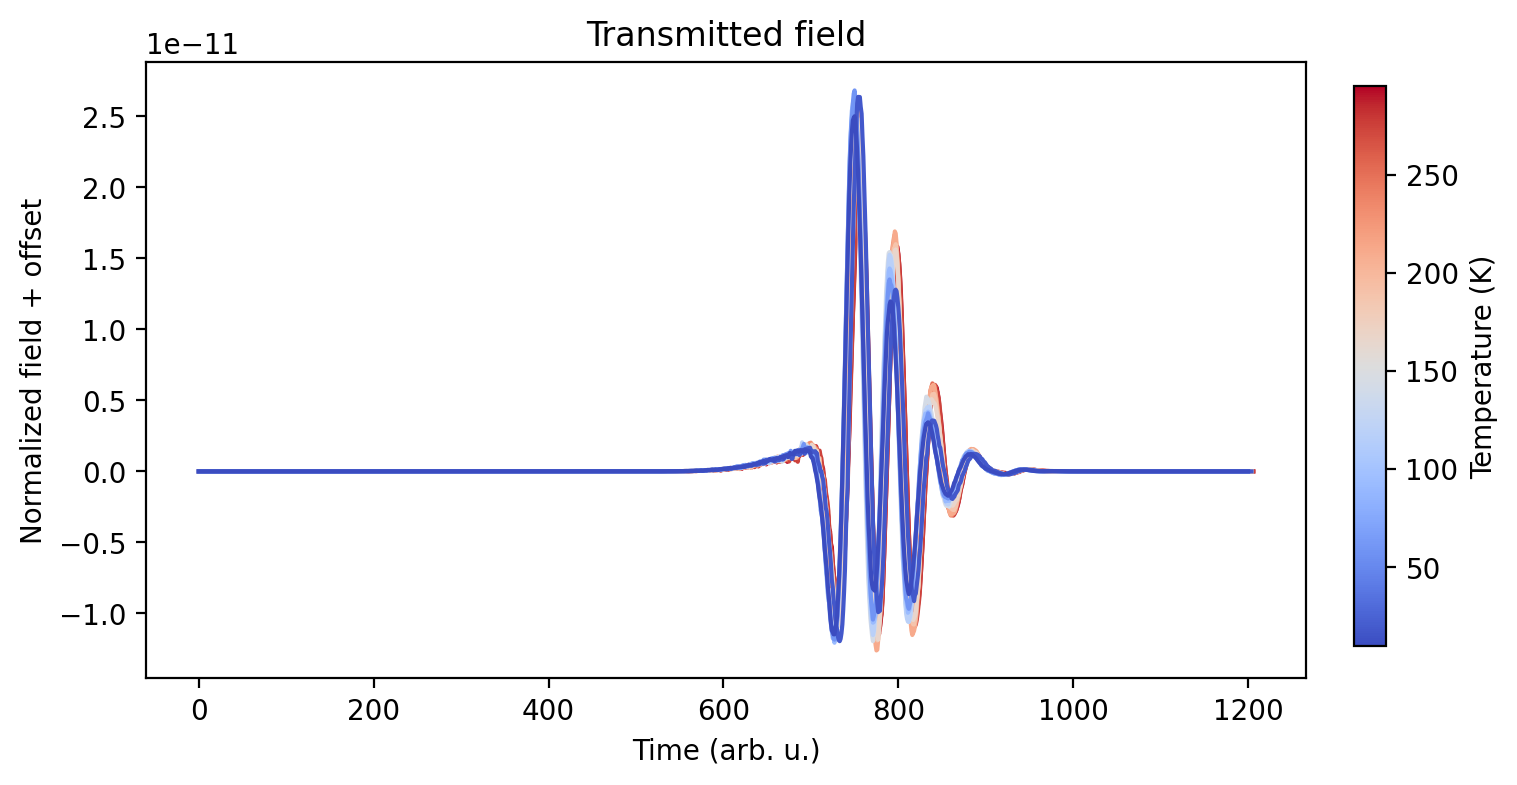

In [95]:
plot_all_windowed_samples(
    nw0,
    nw1,
    nw2,
    archivos_dat_samp,
    archivos_dat_ref,
    figsize=(8, 4),
    dpi=200,
    cmap=cm.coolwarm,
    offset_factor=0.3,         # factor de desplazamiento vertical
    field_label="Normalized field + offset",
    xlabel="Time (arb. u.)",
    title="Transmitted field",
    colorbar_label="Temperature (K)",
    invert_order=True,          # invertir el orden de los archivos
    params_window1 = ['gaussian',70]
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


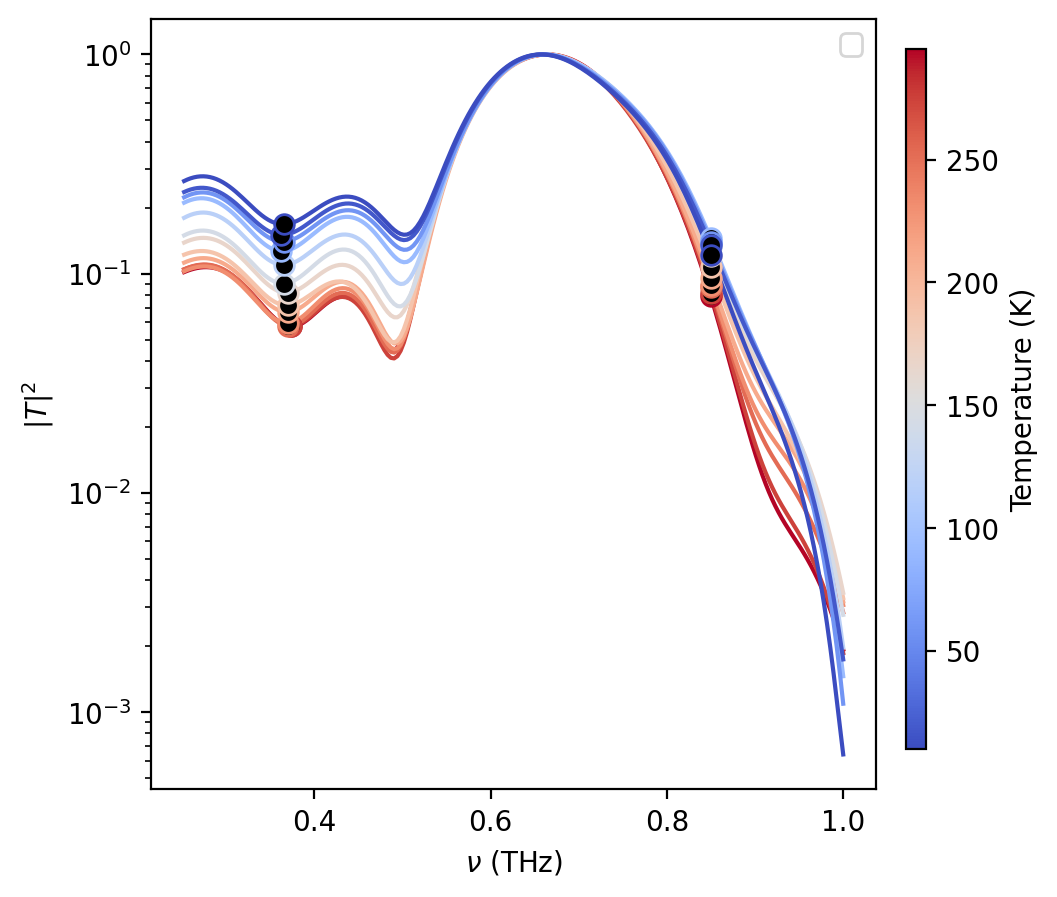

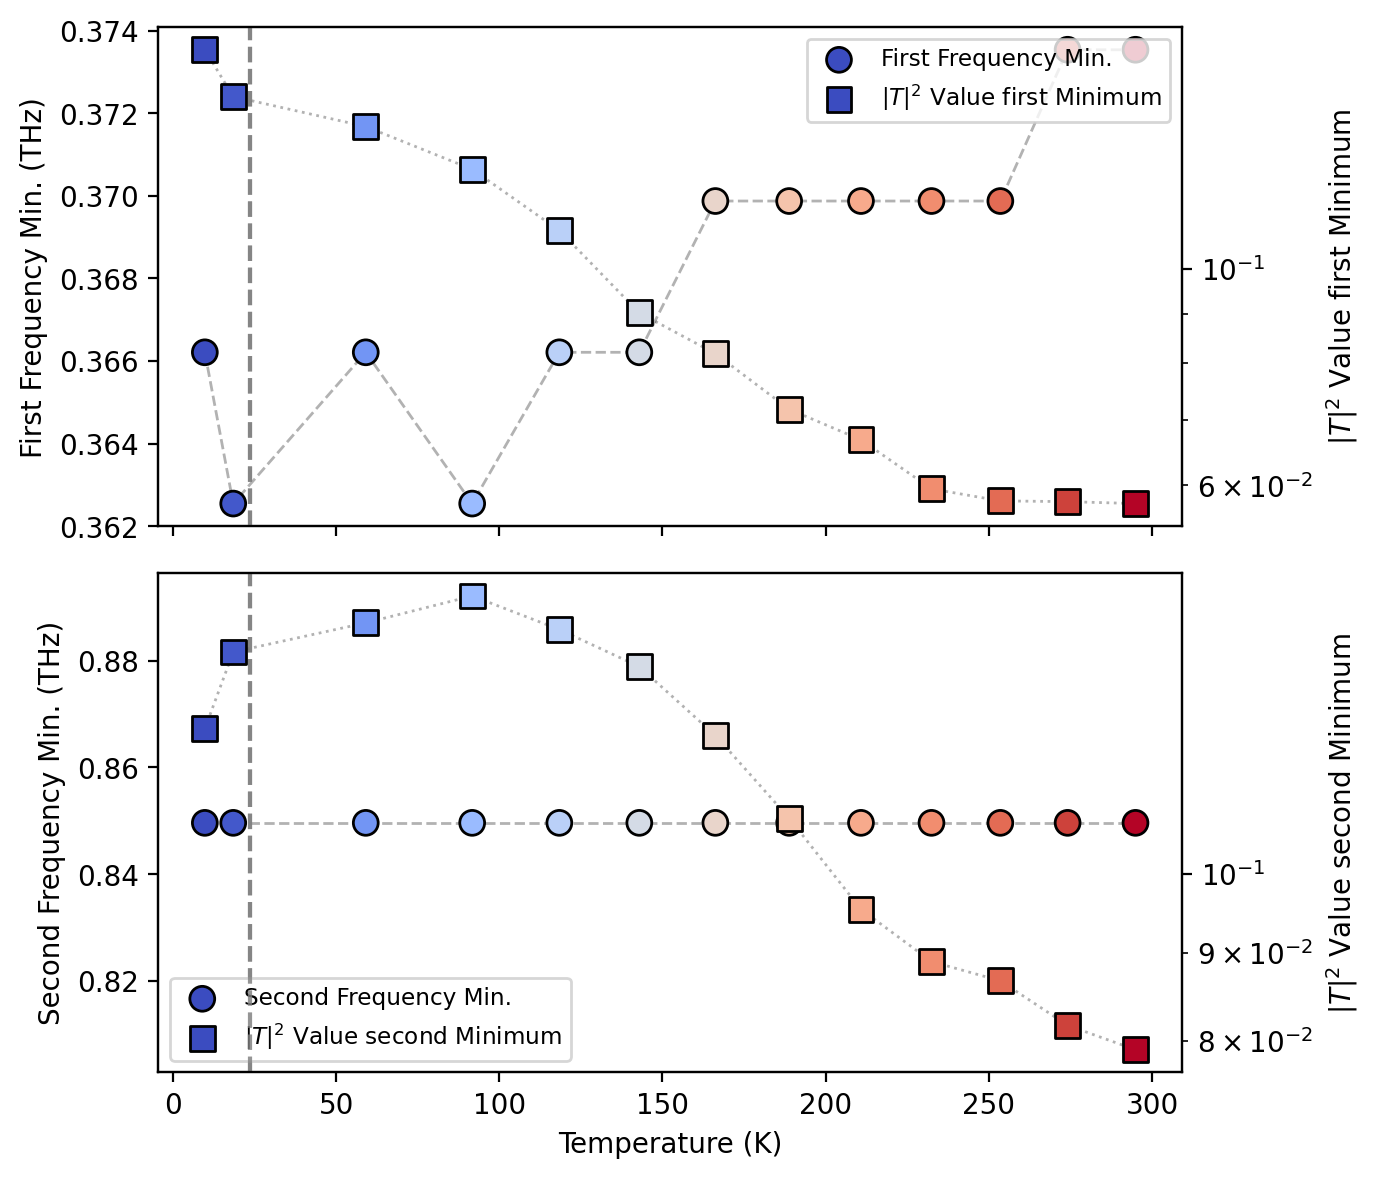

In [97]:
res2 = plot_windowed_frequency_samples(
    archivos_dat_samp=archivos_dat_samp,
    archivos_dat_ref=archivos_dat_ref,
    getFilterdata=getFilterdata,
    extraer_temperatura=extraer_temperatura,
    FourierT2=FourierT2,
    left=nw0, right_sample=nw1, right_subs=nw2,
    N=2**13, fs=30.0, k_trunc=15,
    freq_xlim=(0.2, 95),
    min1_range=(0.3, 0.40),
    min2_range=(0.75, 0.85),
    tn_line=23.5, tn_label=r"$T_N$",
    figsize_summary=(7, 6),
    # etiquetas
    y_label_fft=r"$|T|^{2}$",
    x_label_fft=r"$\nu$ (THz)",
    y_label_min1="$|T|^{2}$ Value first Minimum",
    y_label_min2="$|T|^{2}$ Value second Minimum",
    x_label_temp="Temperature (K)",
    params_window1 = ['gaussian',100]
)